In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('day.csv')

Más informacióm del dataset 

El objetivo es predecir cuantas vicicletas se van a rentar

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


Quita las variables de casual, registered, instant, fecha, mes, año de tu entrenamiento

Hay varias categoricas, cuales son? coviertelas e one hot encoding 

Crea variables dummy 

In [2]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.season.unique()

array([1, 2, 3, 4])

## Borrar variables

In [4]:
df = df.drop(columns=['casual','registered','instant','dteday','mnth','yr'])

In [5]:
df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


## Dummies

In [6]:
df.season.unique()

array([1, 2, 3, 4])

In [7]:
df.holiday.unique()

array([0, 1])

In [8]:
df.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [9]:
df.workingday.unique()

array([0, 1])

In [10]:
df.weathersit.unique()

array([2, 1, 3])

In [11]:
df = pd.get_dummies(df, columns=['season','weathersit','weekday'])

In [12]:
df.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [13]:
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,...,weathersit_1,weathersit_2,weathersit_3,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,0,1,0.196364,0.189405,0.437273,0.248309,1349,True,False,False,...,True,False,False,False,True,False,False,False,False,False
3,0,1,0.200000,0.212122,0.590435,0.160296,1562,True,False,False,...,True,False,False,False,False,True,False,False,False,False
4,0,1,0.226957,0.229270,0.436957,0.186900,1600,True,False,False,...,True,False,False,False,False,False,True,False,False,False


## Visualizar datos

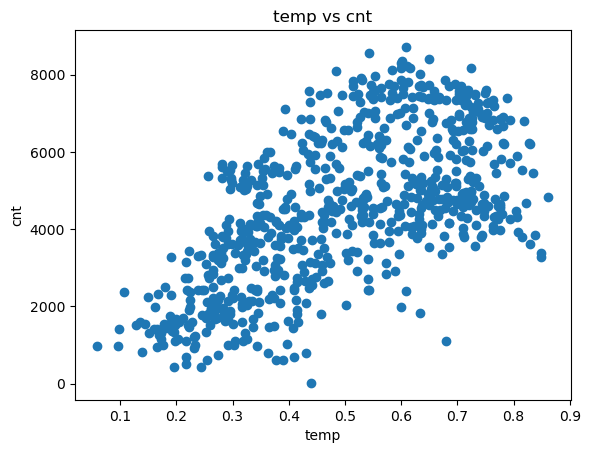

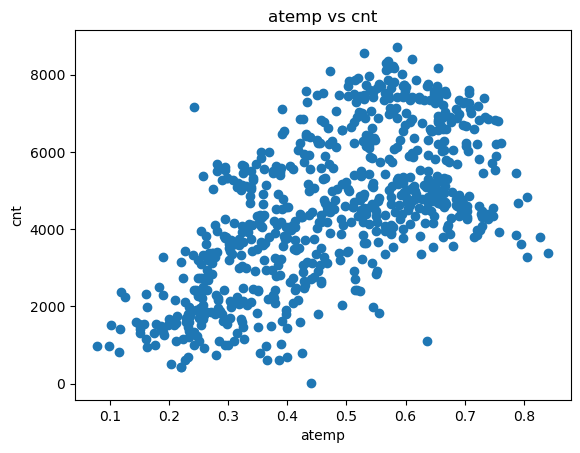

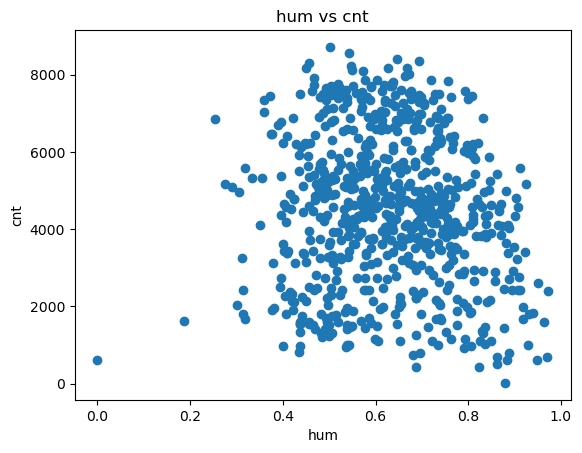

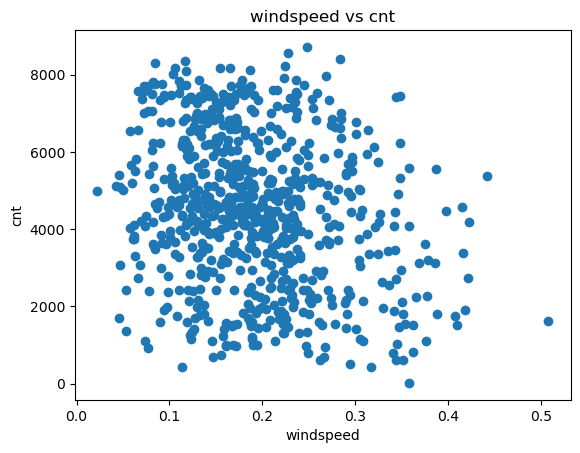

In [14]:
num_features = ['temp','atemp','hum','windspeed']

for i in num_features:
    plt.scatter(df[i],df['cnt'])
    plt.title(f'{i} vs cnt')
    plt.xlabel(i)
    plt.ylabel('cnt')
    plt.show()

Estas gráficas nos pueden ayudar a entender alguna relación entre las variables, en este caso tanto la variable **temp** y **atemp** parecen tener una relación postiva, a mayor incremento en $x$, mayor incremento en $y$, es decir, se rentan más bicicletas. En cuanto a las variables de hum y windspeed no se aprecia una relación tan clara, solo que la humedad suele ser alta y la velocidad del viento tiende a ser baja.

## Análisis bivariado

In [15]:
df_numerical = df[['temp','atemp','hum','windspeed','cnt']]
df_numerical = df_numerical.copy()

### Temp

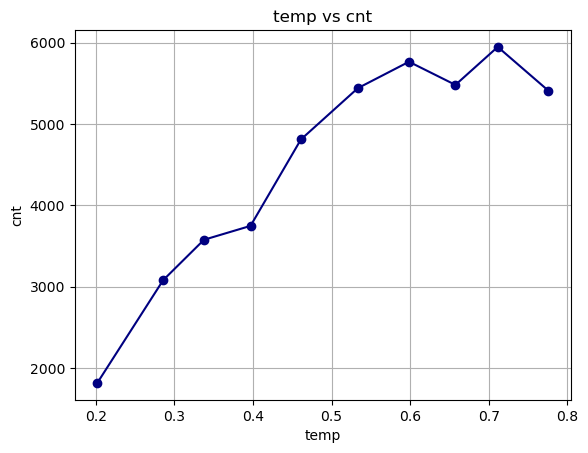

In [16]:
df_numerical['temp_bins'] = pd.qcut(df_numerical['temp'], q=10, labels=False) + 1
grouped_temp = df_numerical.groupby('temp_bins').mean()
plt.plot(grouped_temp['temp'],grouped_temp['cnt'], marker = 'o', c = 'navy')
plt.title('temp vs cnt')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.grid()

### Atemp

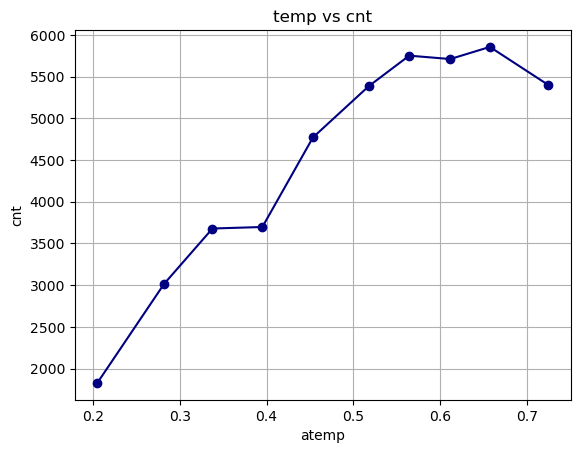

In [17]:
df_numerical['atemp_bins'] = pd.qcut(df_numerical['atemp'], q=10, labels=False) + 1
grouped_atemp = df_numerical.groupby('atemp_bins').mean()
plt.plot(grouped_atemp['atemp'],grouped_atemp['cnt'], marker = 'o', c = 'navy')
plt.title('temp vs cnt')
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.grid()

### Hum

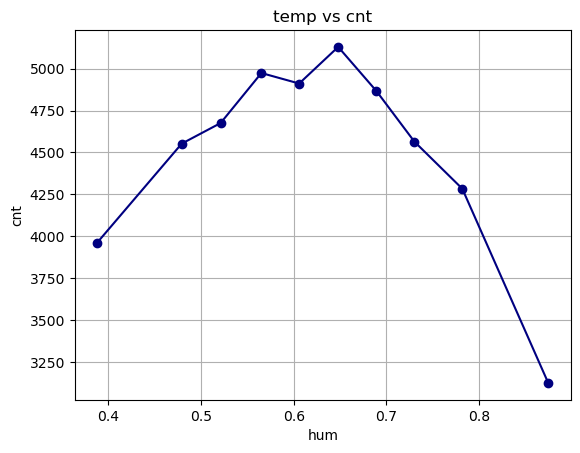

In [18]:
df_numerical['hum_bins'] = pd.qcut(df_numerical['hum'], q=10, labels=False) + 1
grouped_hum = df_numerical.groupby('hum_bins').mean()
plt.plot(grouped_hum['hum'],grouped_hum['cnt'], marker = 'o', c = 'navy')
plt.title('temp vs cnt')
plt.xlabel('hum')
plt.ylabel('cnt')
plt.grid()

### Windspeed

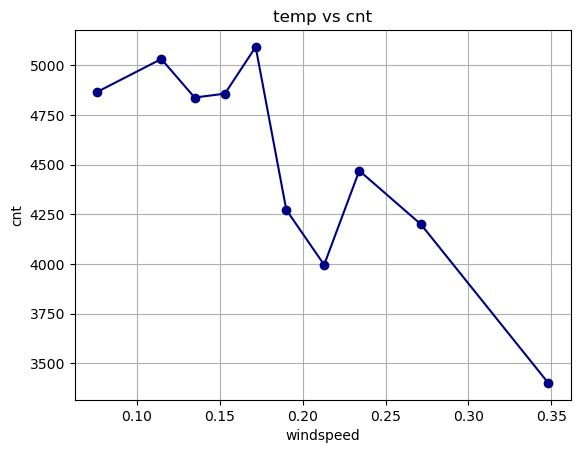

In [19]:
df_numerical['windspeed_bins'] = pd.qcut(df_numerical['windspeed'], q=10, labels=False) + 1
grouped_wind = df_numerical.groupby('windspeed_bins').mean()
plt.plot(grouped_wind['windspeed'],grouped_wind['cnt'], marker = 'o', c = 'navy')
plt.title('temp vs cnt')
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.grid()